In [4]:
# Etapa 2 - Carregando os Dados

# Importando bibliotecas principais
import pandas as pd
import numpy as np

# Lendo o dataset com o caminho correto
df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Visualizando as primeiras linhas
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Dimensão da base
print("Formato da base:", df.shape)

# Nomes e tipos de colunas
print("\nInformações gerais:")
df.info()

# Resumo estatístico para colunas numéricas
df.describe()


Formato da base: (7043, 21)

Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# Total de valores ausentes por coluna
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# Quantos valores diferentes cada coluna possui?
df.nunique()


customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [8]:
# Distribuição da variável alvo
df['Churn'].value_counts(normalize=True)


Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [9]:
# Verificando novamente valores nulos
df.isnull().sum()
 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
# Substituir valores nulos de TotalCharges por 0 ou pela média/mediana
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # corrige erro de tipo
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)  # preenche com mediana


/var/folders/pc/75l39dfn26b0zk4lgqf39y440000gn/T/ipykernel_14214/4267233128.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)  # preenche com mediana


In [11]:
# Checar tipos de dados novamente
df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [12]:
# Exemplo já usado acima para TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [13]:
# Verificando duplicatas
df.duplicated().sum()

# Removendo duplicatas se houver
df.drop_duplicates(inplace=True)


In [14]:
# Identificar colunas categóricas (excluindo a variável alvo)
colunas_cat = df.select_dtypes(include='object').columns.tolist()
colunas_cat.remove('customerID')  # não tem valor preditivo

# Aplicar One-Hot Encoding
df = pd.get_dummies(df, columns=colunas_cat, drop_first=True)


In [15]:
# Criando pasta se não existir
import os
os.makedirs('../data/processed', exist_ok=True)

# Salvando dataset limpo
df.to_csv('../data/processed/df_telco_limpo.csv', index=False)


In [22]:
import os
print(os.getcwd())


/Users/gabrielabelodasilva/Desktop/telco-churn-predictor


In [23]:
# Depois de limpar e preparar seu dataframe df
df.to_csv("data/df_limpo.csv", index=False)


In [27]:
df = pd.read_csv("data/df_limpo.csv")
print(df.columns)


Index(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("data/df_limpo.csv")

X = df.drop("Churn_Yes", axis=1)
y = df["Churn_Yes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Treino:", X_train.shape)
print("Teste :", X_test.shape)


Treino: (4930, 31)
Teste : (2113, 31)


In [29]:
# Importando modelo
from sklearn.tree import DecisionTreeClassifier

# Criando e treinando o modelo
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)


ValueError: could not convert string to float: '4906-ZHGPK'

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Carregando os dados
df = pd.read_csv("data/df_limpo.csv")

# Removendo colunas que não devem ir para o modelo
X = df.drop(["customerID", "Churn_Yes"], axis=1)
y = df["Churn_Yes"]

# Separando dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando o modelo
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)

print("Modelo treinado com sucesso!")


Modelo treinado com sucesso!


In [31]:
from sklearn.metrics import accuracy_score, classification_report

# Fazendo previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Avaliando
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred))


Acurácia: 0.738760056791292

Relatório de Classificação:

              precision    recall  f1-score   support

       False       0.82      0.82      0.82      1539
        True       0.52      0.51      0.52       574

    accuracy                           0.74      2113
   macro avg       0.67      0.67      0.67      2113
weighted avg       0.74      0.74      0.74      2113



In [33]:
import joblib

# Salvando modelo
joblib.dump(modelo, "eda_churn_telco")
print("Modelo salvo com sucesso!")


Modelo salvo com sucesso!


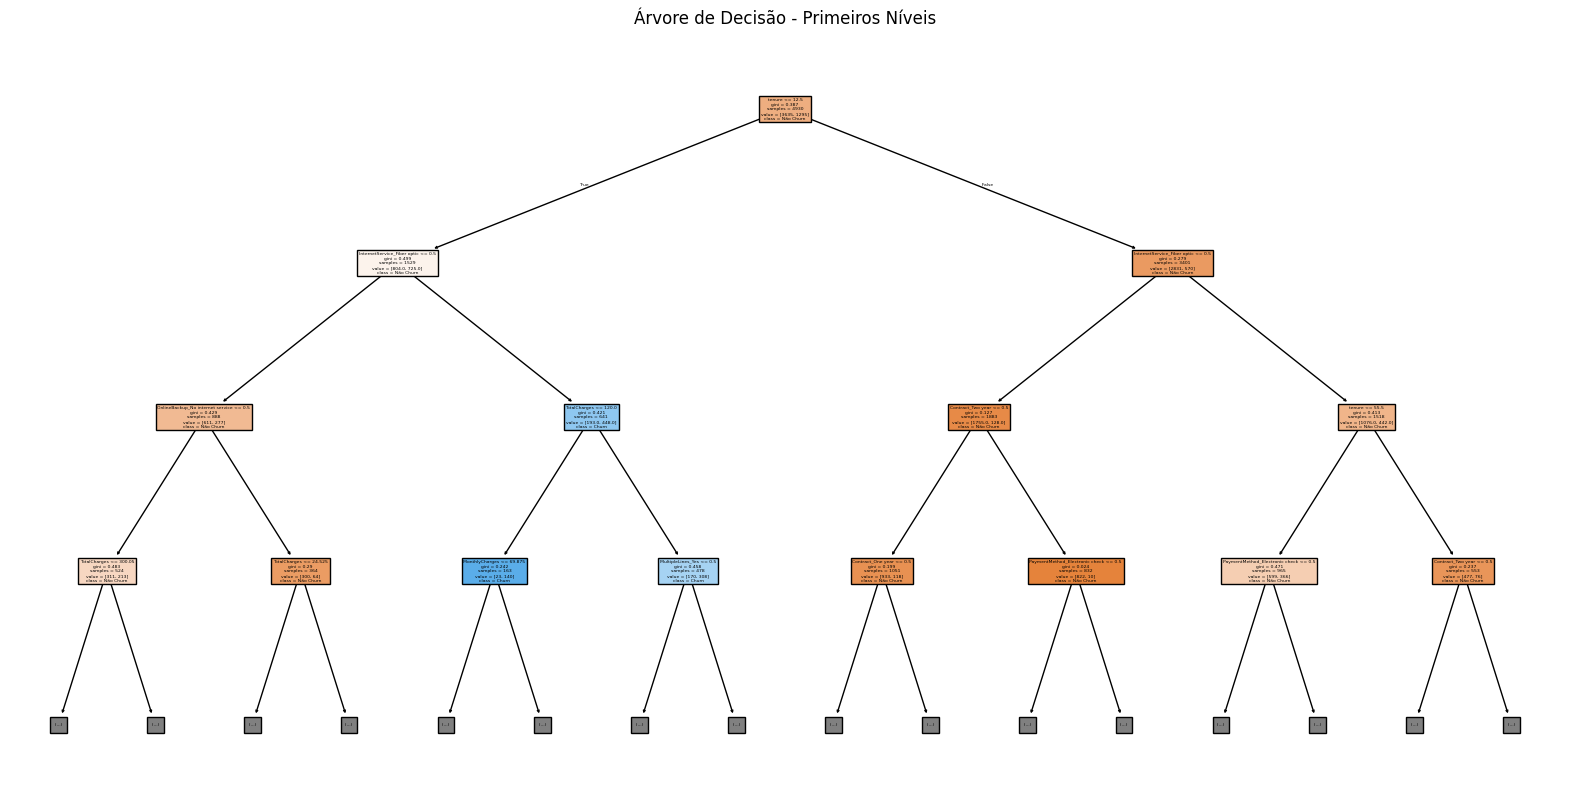

In [34]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(modelo, feature_names=X.columns, class_names=["Não Churn", "Churn"], filled=True, max_depth=3)
plt.title("Árvore de Decisão - Primeiros Níveis")
plt.show()


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Treinando o modelo
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Previsões
y_pred_rf = rf.predict(X_test)

# Avaliação
print("Acurácia Random Forest:", accuracy_score(y_test, y_pred_rf))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_rf))


Acurácia Random Forest: 0.7960246095598675

Relatório de Classificação:
               precision    recall  f1-score   support

       False       0.82      0.92      0.87      1539
        True       0.68      0.47      0.56       574

    accuracy                           0.80      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.78      0.80      0.78      2113



In [36]:
from sklearn.linear_model import LogisticRegression

# Regressão logística
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Previsões
y_pred_lr = lr.predict(X_test)

# Avaliação
print("Acurácia Regressão Logística:", accuracy_score(y_test, y_pred_lr))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_lr))


Acurácia Regressão Logística: 0.8135352579271179

Relatório de Classificação:
               precision    recall  f1-score   support

       False       0.85      0.90      0.88      1539
        True       0.69      0.57      0.63       574

    accuracy                           0.81      2113
   macro avg       0.77      0.74      0.75      2113
weighted avg       0.81      0.81      0.81      2113



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
import joblib

# Salvar os modelos treinados
joblib.dump(modelo, "eda_churn_telco")
joblib.dump(rf, "eda_churn_telco")
joblib.dump(lr, "eda_churn_telco")

print("Modelos salvos com sucesso!")


Modelos salvos com sucesso!
